In [69]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

## k-means: Toy Data

### Step 1: Preprocessing

In [70]:
## STEP 1: Convert text file to vectors
with open('toydata.txt', 'r') as file:
    #lines = [line.rstrip() for line in file]
    lines = [line.strip() for line in file]

vectors = []

for i in range(len(lines)):
    for j in range(len(lines[i])):
        if lines[i][j] == ' ':
            coord1 = float(lines[i][:j])
            coord2 = float(lines[i][j:])
            vectors.append(np.array([coord1, coord2]))
            break

In [71]:
x = vectors
k = 3
N = 500


### Step 2: The algorithm

In [72]:
#all_Js contains 20 lists where each list contains a list of the decreasing J values
all_Js = []
for q in range(20):
    #initialize m randomly
    ms = np.ndarray((k, 2))
    for i in range(k):
        index = random.randint(0, N - 1)
        ms[i] = x[index]
    
    gammas = np.zeros(N, dtype=int)
    for i in range(N):
            min_index = -1
            min_dist = np.Inf
            for j in range(k):
                dist_norm = np.linalg.norm(x[i] - ms[j])
                if dist_norm < min_dist:
                    min_dist = dist_norm
                    gammas[i] = j

    cont = True
    Js = []
    while cont:

        #Calculate Clusters C and distortion J
        C = []
        for i in range(k):
            C_i = []
            C.append(C_i)

        for i in range(N):
            g = gammas[i]
            C[g].append(x[i])

        for j in range(k):
            len_Cj = len(C[j])
            ms[j] = (1/len_Cj)
            sum = 0
            for i in range(len_Cj):
                sum = sum + C[j][i]
            ms[j] = ms[j]*sum

            #update gammas then m
        for i in range(N):
            min_index = -1
            min_dist = np.Inf
            for j in range(k):
                dist_norm = np.linalg.norm(x[i] - ms[j])
                if dist_norm < min_dist:
                    min_dist = dist_norm
                    gammas[i] = j
            
        J = 0.0
        for i in range(N):
            g = gammas[i]
            d = np.linalg.norm(x[i] - ms[g])**2
            J = J + d
        
        if len(Js) > 0 and np.linalg.norm(J - Js[-1]) < 1:
            Js.append(J)
            cont = False
        Js.append(J)
    all_Js.append(Js)

        




### Step 3: Plot decreasing distortion

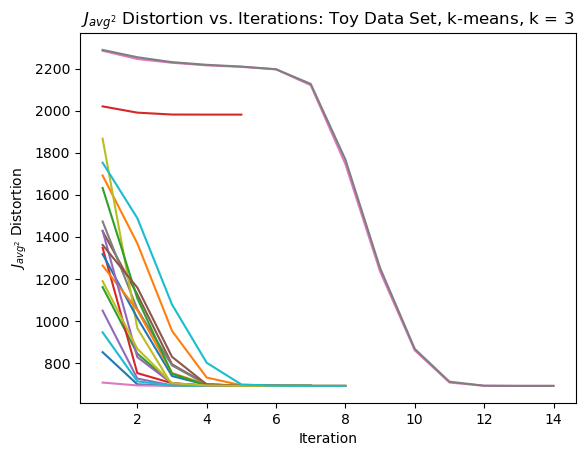

In [81]:
fig, ax = plt.subplots()
ax.set_title("$J_{avg^2}$ Distortion vs. Iterations: Toy Data Set, k-means, k = 3")
ax.set_xlabel("Iteration")
ax.set_ylabel("$J_{avg^2}$ Distortion")

for q in range(20):
    num_iter = len(all_Js[q])
    Ts = np.arange(num_iter) + 1
    ax.plot(Ts, all_Js[q])

### Step 4: Plot clusters to verify success

Text(0, 0.5, 'y')

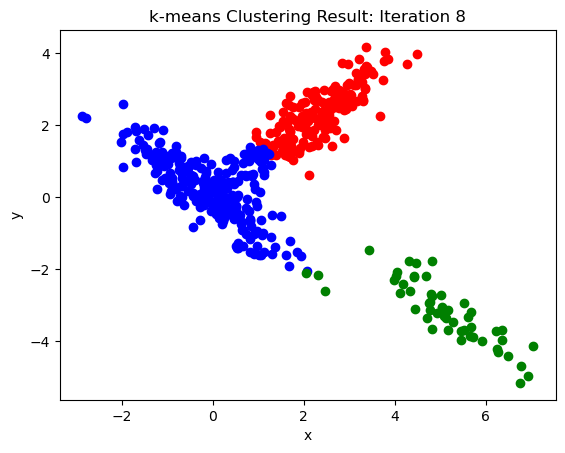

In [74]:
#Plotting the last result
fig, ax = plt.subplots()
colors = ['r', 'b', 'g']
for i in range(k):
    for j in range(len(C[i])):
        x_j1 = C[i][j][0]
        x_j2 = C[i][j][1]
        ax.scatter(x_j1, x_j2, color=colors[i])
ax.set_title(f"k-means Clustering Result: Iteration {Ts[-1]}")
ax.set_xlabel("x")
ax.set_ylabel("y")

## k-means++: Toy Data

### Step 1: Create functions to calculate D and p

In [75]:
def D(imin1, xj, ms):
    minimum = np.Inf
    for p in range(imin1 + 1):
        dist = np.linalg.norm(xj - ms[imin1])
        if dist < minimum:
            minimum = dist
    return minimum

def p(i, xj, ms, N):
    num = D(i - 1, xj, ms)**2
    denom = 0.0
    for l in range(N):
        xl = x[l]
        cur_D = D(i - 1, xl, ms)**2
        denom = denom + cur_D
    return num / denom


### Step 2: The algorithm

In [78]:
all_Jpps = []
for q in range(20):
    #This is the k-means++ step
    ms[0] = random.sample(x, 1)[0]
    for i in range(1, k):
        p_mi = []
        for j in range(N):
            xj = x[j]
            prob = p(i, xj, ms, N)
            p_mi.append(prob)
        
        m_index = np.random.choice(range(N), p=p_mi) 
        ms[i] = x[m_index]

    #identical to k-means from here
    gammas = np.zeros(N, dtype=int)
    for i in range(N):
            min_index = -1
            min_dist = np.Inf
            for j in range(k):
                dist_norm = np.linalg.norm(x[i] - ms[j])
                if dist_norm < min_dist:
                    min_dist = dist_norm
                    gammas[i] = j

    cont = True
    Jpps = []
    while cont:

        #Calculate Clusters C and distortion J
        C = []
        for i in range(k):
            C_i = []
            C.append(C_i)

        for i in range(N):
            g = gammas[i]
            C[g].append(x[i])

        for j in range(k):
            len_Cj = len(C[j])
            ms[j] = (1/len_Cj)
            sum = 0
            for i in range(len_Cj):
                sum = sum + C[j][i]
            ms[j] = ms[j]*sum

            #update gammas then m
        for i in range(N):
            min_index = -1
            min_dist = np.Inf
            for j in range(k):
                dist_norm = np.linalg.norm(x[i] - ms[j])
                if dist_norm < min_dist:
                    min_dist = dist_norm
                    gammas[i] = j
            
        J = 0.0
        for i in range(N):
            g = gammas[i]
            d = np.linalg.norm(x[i] - ms[g])**2
            J = J + d
        
        if len(Jpps) > 0 and np.linalg.norm(J - Jpps[-1]) < 1:
            Jpps.append(J)
            cont = False
        Jpps.append(J)
    all_Jpps.append(Jpps)


### Step 3: Plot decreasing distortion

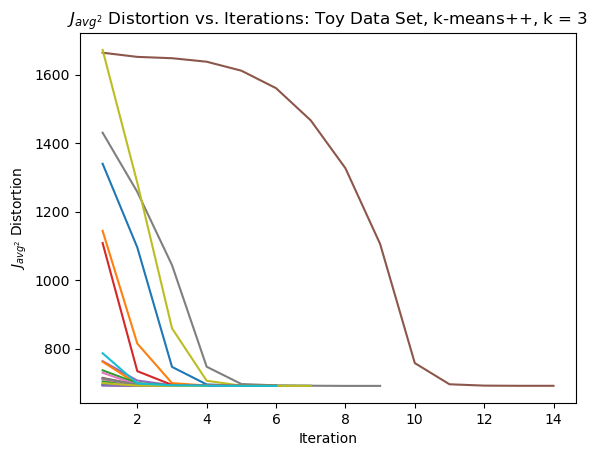

In [82]:
fig, ax = plt.subplots()
ax.set_title("$J_{avg^2}$ Distortion vs. Iterations: Toy Data Set, k-means++, k = 3")
ax.set_xlabel("Iteration")
ax.set_ylabel("$J_{avg^2}$ Distortion")

for q in range(20):
    num_iter = len(all_Jpps[q])
    Ts = np.arange(num_iter) + 1
    ax.plot(Ts, all_Jpps[q])

### Step 4: Plot clusters to verify success

Text(0, 0.5, 'y')

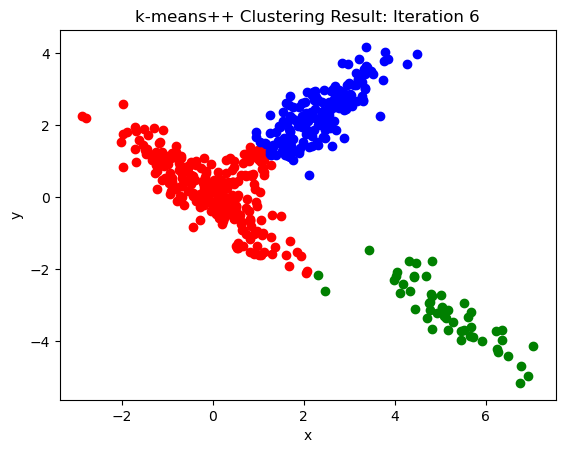

In [84]:
fig, ax = plt.subplots()
colors = ['r', 'b', 'g']
for i in range(k):
    for j in range(len(C[i])):
        x_j1 = C[i][j][0]
        x_j2 = C[i][j][1]
        ax.scatter(x_j1, x_j2, color=colors[i])
ax.set_title(f"k-means++ Clustering Result: Iteration {Ts[-1]}")
ax.set_xlabel("x")
ax.set_ylabel("y")

## Compare metrics between k-means and k-means++

In [86]:
#Compare kmeans to kmeans++
flat_Jpp = []
flat_J = []
flat_Tpp = []
flat_T = []

for i in range(len(all_Jpps)):
    for j in range(len(all_Jpps[i])):
        flat_Jpp.append(all_Jpps[i][j])
    flat_Tpp.append(len(all_Jpps[i]))

for i in range(len(all_Js)):
    for j in range(len(all_Js[i])):
        flat_J.append(all_Js[i][j])
    flat_T.append(len(all_Js[i]))

avg_J = np.average(flat_J)
std_J = np.std(flat_J)
med_J = np.median(flat_J)
avg_T = np.average(flat_T)

avg_Jpp = np.average(flat_Jpp)
std_Jpp = np.std(flat_Jpp)
med_Jpp = np.median(flat_Jpp)
avg_Tpp = np.average(flat_Tpp)

round_to = 2

print(f"Average distortion for k-means: {round(avg_J, round_to)}")
print(f"Standard deviation of distortion for k-means: {round(std_J, round_to)}")
print(f"Median distortion for k-means: {round(med_J, round_to)}")
print(f"Average required iterations for k-means: {avg_T}\n")

print(f"Average distortion for k-means++: {round(avg_Jpp, round_to)}")
print(f"Standard deviation of distortion for k-means++: {round(std_Jpp, round_to)}")
print(f"Median distortion for k-means++: {round(med_Jpp, round_to)}")
print(f"Average required iterations for k-means++: {avg_Tpp}")

Average distortion for k-means: 1019.74
Standard deviation of distortion for k-means: 515.06
Median distortion for k-means: 698.43
Average required iterations for k-means: 7.35

Average distortion for k-means++: 808.65
Standard deviation of distortion for k-means++: 266.24
Median distortion for k-means++: 691.85
Average required iterations for k-means++: 5.8
